<a href="https://colab.research.google.com/github/abilal19/Spectral-Clustering-Blog-Political-Affiliations/blob/main/HW2Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from PIL import Image
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()


In [26]:
# from google.colab import files
# uploaded = files.upload()

**Q1 Assume the number of clusters in the graph is k. Explain the meaning of k here intuitively.**

**Ans**: K here refers to the number of clusters in the graph. This means that k is the number of connected node groups in the dataset. Each of the k clusters is a community of connected interconnected nodes seperated from the other communities. Each cluster has nodes more tightly interconnected than the nodes around them thatr are outside the cluster.

Now we will move onto using spectral clustering to nd the k = 2; 5; 10; 20 clusters in the network of political blogs

In [27]:
nodes = pd.read_csv('nodes.txt',sep='\t',header=None)
nodes.index += 1
nodes.head(15)


,0,1,2,3
1,1,100monkeystyping.com,0,Blogarama
2,2,12thharmonic.com/wordpress,0,BlogCatalog
3,3,40ozblog.blogspot.com,0,"Blogarama,BlogCatalog"
4,4,4lina.tblog.com,0,Blogarama
5,5,750volts.blogspot.com,0,Blogarama
6,6,95theses.blogspot.com,0,Blogarama
7,7,abbadabbaduo.blogspot.com,0,"Blogarama,LeftyDirectory"
8,8,aboutpolitics.blogspot.com,0,"Blogarama,eTalkingHead"
9,9,achingandspinning.blogspot.com,0,Blogarama
10,10,ackackack.com,0,BlogCatalog


In [28]:
edges = pd.read_csv('edges.txt', sep='\t', header=None)
edges.index += 1
edges.head()

,0,1
1,267,1394
2,267,483
3,267,1051
4,904,1479
5,904,919


Pre-Processing Before Spectral Clustering

In [29]:
import networkx as nx
G = nx.Graph()


In [30]:
#making a tuple of each row within the edges dataframe
edge_list = [tuple(lists) for lists in edges.to_numpy()]
G.add_edges_from(edge_list)



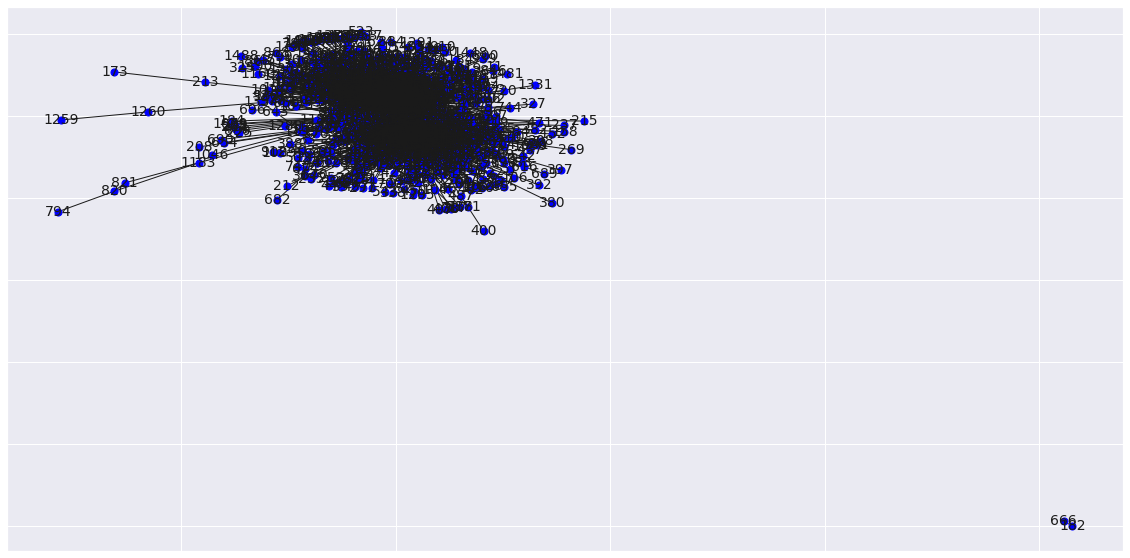

In [31]:
plt.figure(figsize=(20,10))
nx.draw_networkx(G, with_labels=True,node_size=50, font_size=14, linewidths =1,node_color='blue')

We can see that nodes 666 and 182 are disconnected from the rest. We will keep them though because they are connected to each other and we are treating this graph as an undirected graph. However, we will remove the completely isolated nodes.

In [32]:

connected = np.array([node for lists in (list(nx.connected_components(G))) for node in lists])
connected_shape= connected.shape[0]
connected[:10]
print(connected_shape)

1224


We can see now that the isolated nodes have been removed from the data. Now we will begin Spectral Clustering

Making the Adjascency Matrix

In [33]:
A = pd.DataFrame(np.zeros((connected_shape,connected_shape),dtype=int),index =connected, columns= connected)

for _, value in edges.iterrows(): 
    A.loc[value[0],value[1]] = 1
    A.loc[value[1],value[0]] = 1

A = A.to_numpy()
print('Adjascency Matrix')
print(A)

Adjascency Matrix
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


Degree Matrix

In [34]:
from scipy.linalg import fractional_matrix_power
D = np.diag(np.sum(np.array(A),axis=1))
D_1_2= fractional_matrix_power(D, -0.5)
print('Degree Matrix')
print(D_1_2)

Degree Matrix
[[0.19611614 0.         0.         ... 0.         0.         0.        ]
 [0.         0.1490712  0.         ... 0.         0.         0.        ]
 [0.         0.         0.5        ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


Laplacian Matrix

In [35]:
L = D_1_2@A@D_1_2
print('Laplacian Matrix:')
print(L)


Laplacian Matrix:
[[0.         0.02923527 0.         ... 0.         0.         0.        ]
 [0.02923527 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]]


**First we will sort the eigen values in order of the largest to the smallest, we will then chose the largest k eigen vectors first which is equivalent to  *smallest* eigenvector of D−A=D1/2(I−D−1/2AD−1/2)**

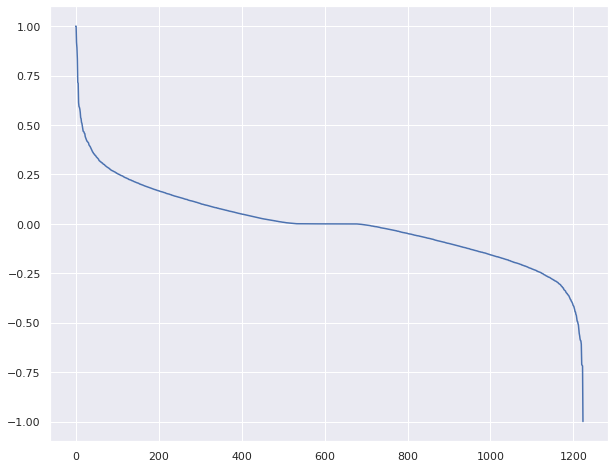

In [36]:
eigenValues, eigenVectors = np.linalg.eig(L)

idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx].real
eigenVectors = eigenVectors[:,idx].real
plt.figure(figsize=(10,8))
plt.plot(eigenValues)



In [37]:
print(eigenVectors[:,0:5])

[[-2.78876546e-02  0.00000000e+00  7.52907210e-04 -2.79824877e-02
   6.96656947e-04]
 [-3.66886366e-02  0.00000000e+00  1.02954977e-03 -4.32361329e-02
   1.21077848e-03]
 [-1.09384381e-02  0.00000000e+00  2.64078654e-04 -8.34520114e-04
  -2.39863550e-04]
 ...
 [-5.46921903e-03  0.00000000e+00  7.66416256e-05  6.68139771e-03
  -4.51701474e-04]
 [ 0.00000000e+00  7.07106781e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  7.07106781e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


We will now use the KMeans algorithm on the matrix of top k eigen vectors as the column vectors. 

In [38]:
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None  
nodes = nodes.loc[connected,:]
print(nodes.shape)

def graphcluster(k):
  x=eigenVectors[:,0:k]
  x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)
  kmeans = KMeans(n_clusters=k, random_state=7).fit(x)
  #use the kmeans labels to find the mode value (0 or 1) of the nodes within the cluster and the assign that cluster the mode value (0 or 1)
  c_idx = kmeans.labels_
  nodes['labels'] = c_idx
  for c_label in range(k):
    cluster_val = nodes.loc[nodes.labels == c_label,2].mode().iloc[0]
    nodes.loc[nodes.labels == c_label,'labels'] = cluster_val
  
  nodes.loc[connected,2].head(10)
  #print the mismatch rate for each k 
  print('\nResults:')
  fcr = np.sum(nodes.labels != nodes.loc[:,2]) / len(nodes.loc[:,2])
  print('Mismatch rate:{:.2f}%'.format(np.round(fcr*100,2)))
  return np.round(fcr*100,2)



(1224, 4)



Results:
Mismatch rate:48.04%

Results:
Mismatch rate:5.07%

Results:
Mismatch rate:6.21%

Results:
Mismatch rate:6.13%


Text(0.5, 0, 'cluster_version in order of increasing K')

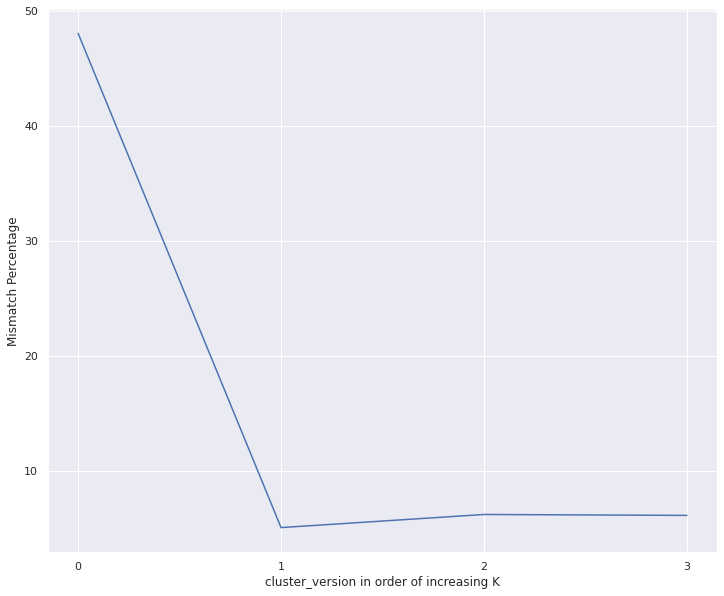

In [39]:
plt.figure(figsize=(12,10))
plt.plot([graphcluster(k) for k in [2,5,10,20]])
plt.xticks(np.arange(4))
plt.ylabel('Mismatch Percentage')
plt.xlabel('cluster_version in order of increasing K')


We can see here that the cluster with k=5 gives us the best mismatch rate and then the mismatch rate does not get any better as we continue to increase the k value

Now we will tune the k value by trying k in range(2,5) to find the smallest k that gives us a good mismatch rate.


Results:
Mismatch rate:48.04%

Results:
Mismatch rate:47.88%

Results:
Mismatch rate:48.04%

Results:
Mismatch rate:5.07%


Text(0.5, 0, 'cluster_version in order of increasing K')

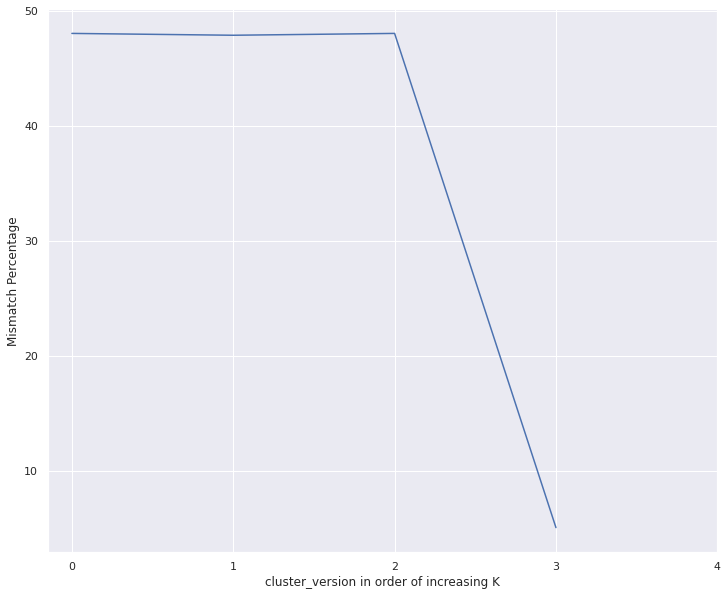

In [41]:
plt.figure(figsize=(12,10))
plt.plot([graphcluster(k) for k in range(2,6)])
plt.xticks(np.arange(4))
plt.ylabel('Mismatch Percentage')
plt.xlabel('cluster_version in order of increasing K')


This shows us that k=5 is the tuned K value for our model as it drastically educes the error rate from 48.04% to 5.07%

** Q5: Please explain the nding and what can you learn from this data analysis. **

The algorithm worked pretty well in picking the right communities with k=5. This shows us that perhaps for community networks with binary class labels, spctral clustering can work fairly well. I am not sure how well this approach would work as we increase the amount of labels we find in the data set.